In [137]:
import cv2
import numpy as np
from PIL import Image

image_num="000007"
img_file = f"normal.png"
#img = cv2.imread().astype(np.float32)
img = Image.open(img_file)
np_img = np.asarray(img)
np_img = np_img.reshape((1,*np_img.shape))

In [138]:
#img = Image.open("sim_13226.jpg")

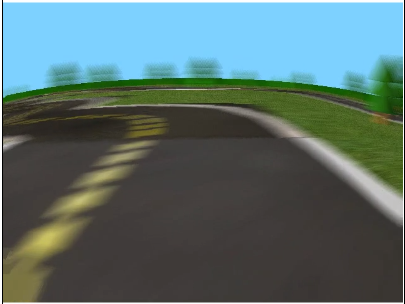

In [139]:
img

In [140]:
img2=img.resize((160,120), 3)

In [141]:
np_img = np.asarray(img2)
#np_img = np_img[:,:,::-1]
np_img = np_img.reshape((1,*np_img.shape))


In [142]:
import onnxruntime as ort
sess_ort = ort.InferenceSession("onnx_models/segmentation.onnx")
import time
start = time.time()
qty = 2
for i in range(0,qty):
    res = sess_ort.run(output_names=["output:0"], input_feed={"input_rgb:0": np_img.astype(np.float32)})
end = time.time()
delta=end-start
seg = res[0].astype(np.uint8).reshape(120,160)
print(f"Average frame rate: {1/(delta/qty)}")


Average frame rate: 11.331929327819978


seg.shape

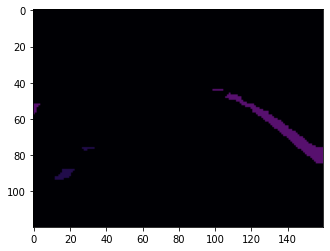

In [143]:
%matplotlib inline
from cv2_plt_imshow import cv2_plt_imshow
#seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
#seg = cv2.transpose(seg.astype(np.uint8).reshape(160,120))
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*32, cv2.COLORMAP_INFERNO))

In [144]:
palette = np.zeros((256,3)).astype(int)

In [145]:
palette[0]=[0,0,0]
palette[1]=[255,255,255]
palette[2]=[255,255,0]
palette[3]=[255,0,0]
palette[4]=[0,0,255]
palette[5]=[0,255,0]
palette[2]=[255,255,255]
palette[1]=[255,255,0]

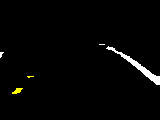

In [146]:
img = Image.fromarray(seg)
img.putpalette(palette.flatten().tolist())
img

In [153]:
# Fix for lines that are behing the first one!

In [156]:
flip_seg = cv2.flip(seg, 0)
white_mask = (flip_seg==2)
line = np.argmax(white_mask[:],axis=0)
line_picture = np.zeros(white_mask.shape)
line_picture[line,range(0,160)]=1
line_picture = cv2.flip(line_picture, 0)


In [159]:
points = []
for y,x in enumerate(line):
    if (y!=0):
        points.append([x,y])

In [160]:
points

[[63, 1],
 [66, 2],
 [67, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [0, 20],
 [0, 21],
 [0, 22],
 [0, 23],
 [0, 24],
 [0, 25],
 [0, 26],
 [0, 27],
 [0, 28],
 [0, 29],
 [0, 30],
 [0, 31],
 [0, 32],
 [0, 33],
 [0, 34],
 [0, 35],
 [0, 36],
 [0, 37],
 [0, 38],
 [0, 39],
 [0, 40],
 [0, 41],
 [0, 42],
 [0, 43],
 [0, 44],
 [0, 45],
 [0, 46],
 [0, 47],
 [0, 48],
 [0, 49],
 [0, 50],
 [0, 51],
 [0, 52],
 [0, 53],
 [0, 54],
 [0, 55],
 [0, 56],
 [0, 57],
 [0, 58],
 [0, 59],
 [0, 60],
 [0, 61],
 [0, 62],
 [0, 63],
 [0, 64],
 [0, 65],
 [0, 66],
 [0, 67],
 [0, 68],
 [0, 69],
 [0, 70],
 [0, 71],
 [0, 72],
 [0, 73],
 [0, 74],
 [0, 75],
 [0, 76],
 [0, 77],
 [0, 78],
 [0, 79],
 [0, 80],
 [0, 81],
 [0, 82],
 [0, 83],
 [0, 84],
 [0, 85],
 [0, 86],
 [0, 87],
 [0, 88],
 [0, 89],
 [0, 90],
 [0, 91],
 [0, 92],
 [0, 93],
 [0, 94],
 [0, 95],
 [0, 96],
 [0, 97],
 [0, 98],
 [75, 99],
 [75, 100],
 [7

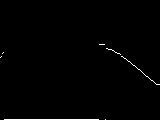

In [161]:
Image.fromarray(line_picture.astype(np.uint8)*255)

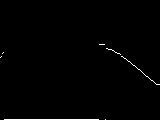

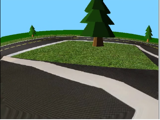

In [96]:
img2

In [34]:
from cv2_plt_imshow import cv2_plt_imshow
seg = cv2.imread(f"logs/segmentation_results/{image_num}_raw_prediction.png",cv2.IMREAD_GRAYSCALE)
#eg = seg.astype(np.uint8).reshape(120,160)
yellow = (seg==1).astype(np.uint8)
white = (seg==2).astype(np.uint8)
cv2_plt_imshow(cv2.applyColorMap(seg*64, cv2.COLORMAP_JET))

AttributeError: 'bool' object has no attribute 'astype'